In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Superstore Sales Dataset.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.set_index('Row ID', inplace= True)

In [5]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
df.shape

(9800, 17)

In [7]:
total_rows = df.shape[0]

for col in df.columns:
    nan_count = df[col].isnull().sum()
    percentage_nan = (nan_count / total_rows) * 100
    print(f"{col}: {percentage_nan:.2f}%")


Order ID: 0.00%
Order Date: 0.00%
Ship Date: 0.00%
Ship Mode: 0.00%
Customer ID: 0.00%
Customer Name: 0.00%
Segment: 0.00%
Country: 0.00%
City: 0.00%
State: 0.00%
Postal Code: 0.11%
Region: 0.00%
Product ID: 0.00%
Category: 0.00%
Sub-Category: 0.00%
Product Name: 0.00%
Sales: 0.00%


In [8]:
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique().shape)
    print()

Unique values in Order ID:
(4922,)

Unique values in Order Date:
(1230,)

Unique values in Ship Date:
(1326,)

Unique values in Ship Mode:
(4,)

Unique values in Customer ID:
(793,)

Unique values in Customer Name:
(793,)

Unique values in Segment:
(3,)

Unique values in Country:
(1,)

Unique values in City:
(529,)

Unique values in State:
(49,)

Unique values in Postal Code:
(627,)

Unique values in Region:
(4,)

Unique values in Product ID:
(1861,)

Unique values in Category:
(3,)

Unique values in Sub-Category:
(17,)

Unique values in Product Name:
(1849,)

Unique values in Sales:
(5757,)



In [8]:
df= df.drop(df[df.duplicated()].index)

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format= "%d/%m/%Y")
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format= "%d/%m/%Y")

In [10]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
df.to_csv("SuperStore Sales_cleaned.csv")

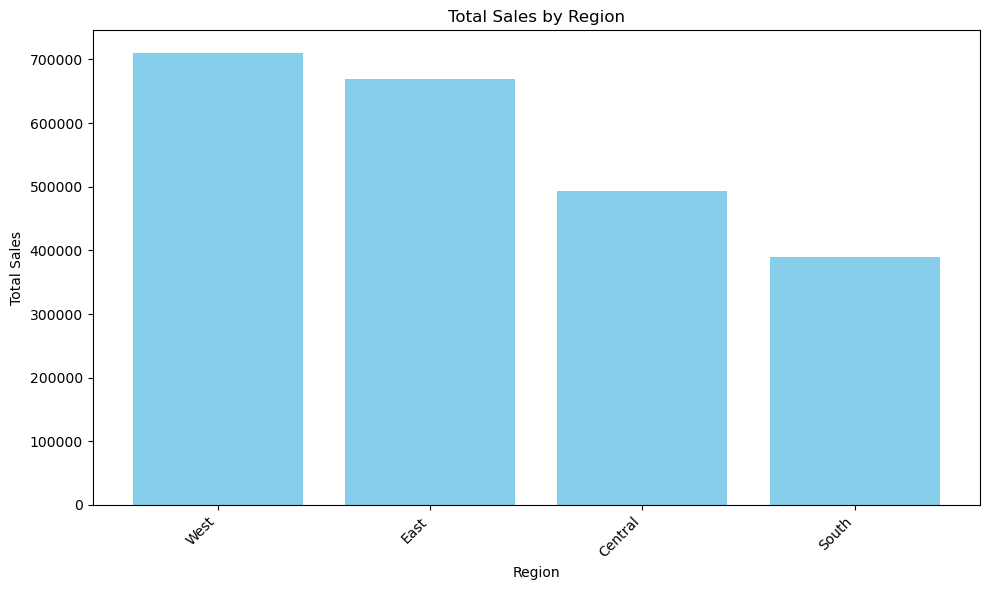

In [15]:
# Group by Region and calculate total Sales
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

# Sort the regions by Sales in descending order
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sales_by_region['Region'], sales_by_region['Sales'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.xticks(rotation=45, ha='right')  # Rotate region names for better readability
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

Regions with consistently declining sales: ['Central', 'East', 'South', 'West']


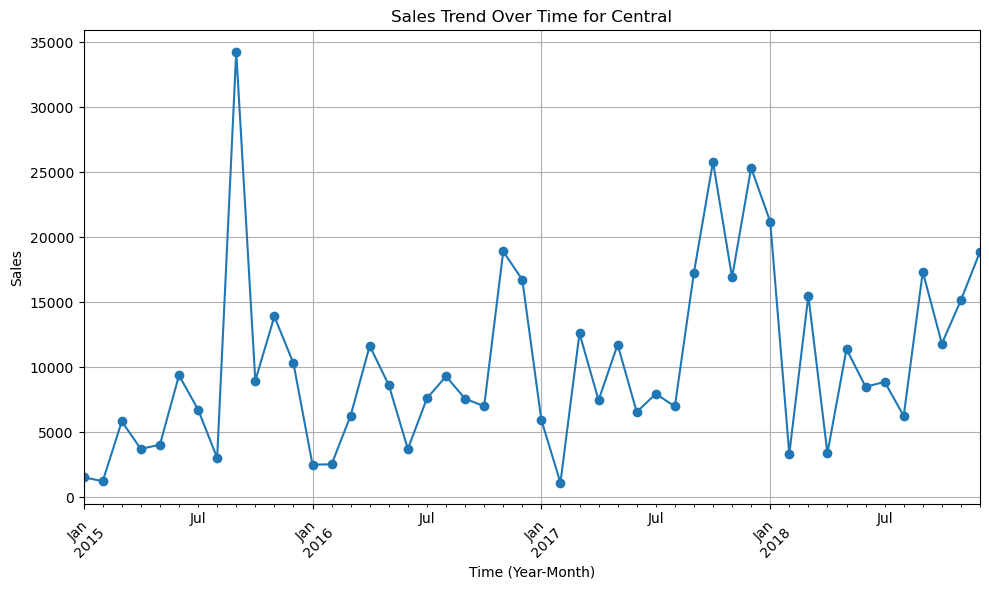

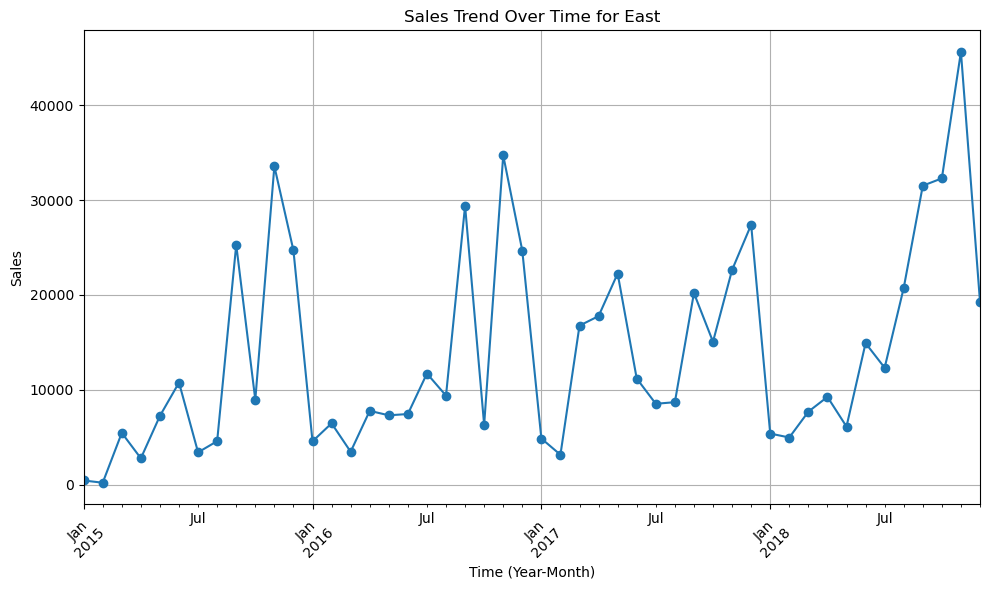

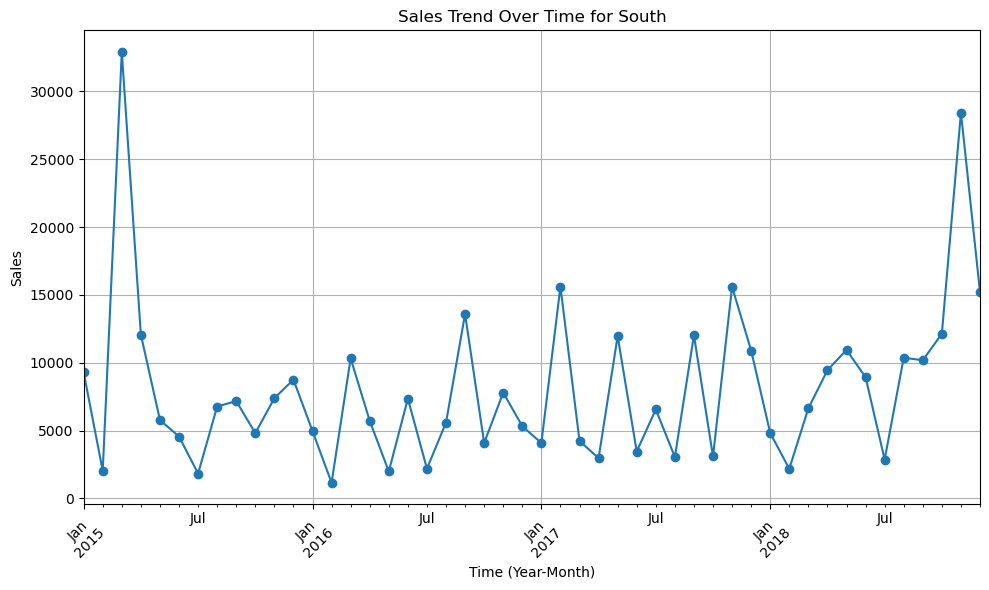

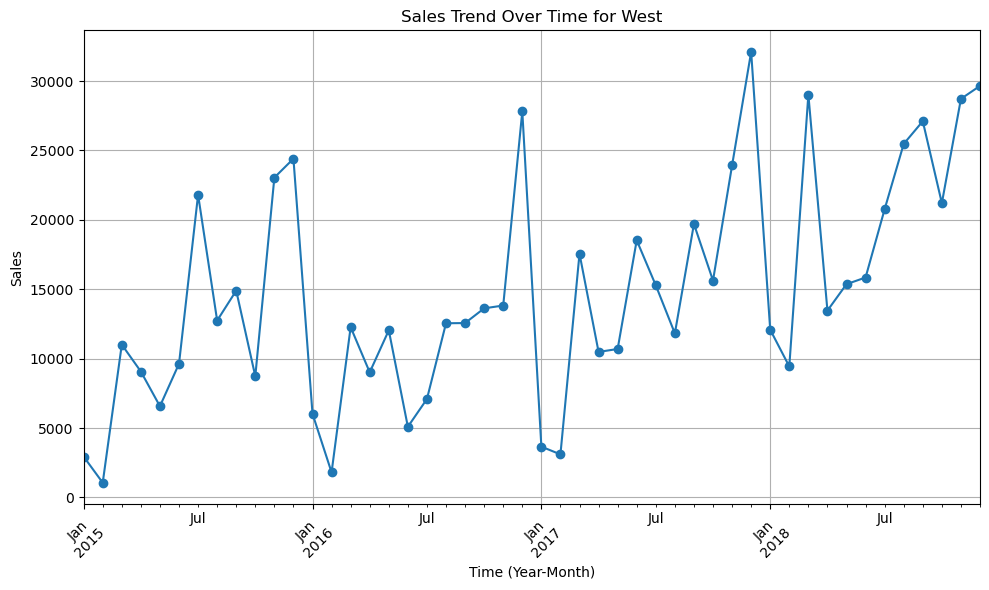

In [17]:
# Group by Region and Year-Month, then sum Sales
sales_trend = df.groupby(['Region', 'Year-Month'])['Sales'].sum().reset_index()

# Pivot the table to have Year-Month as columns and Region as rows
sales_trend_pivot = sales_trend.pivot(index='Region', columns='Year-Month', values='Sales')

# Calculate the percentage change month over month
sales_trend_pct_change = sales_trend_pivot.pct_change(axis=1)

# Identify regions with consistently declining sales (e.g., negative growth over multiple periods)
# For simplicity, we'll define "consistently declining" as having negative growth for three or more consecutive months
declining_regions = sales_trend_pct_change.apply(lambda row: (row < 0).sum() >= 3, axis=1)
declining_regions = declining_regions[declining_regions].index.tolist()

print("Regions with consistently declining sales:", declining_regions)

# Visualize the trends for declining regions
for region in declining_regions:
    plt.figure(figsize=(10, 6))
    sales_trend_pivot.loc[region].plot(marker='o')
    plt.title(f'Sales Trend Over Time for {region}')
    plt.xlabel('Time (Year-Month)')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

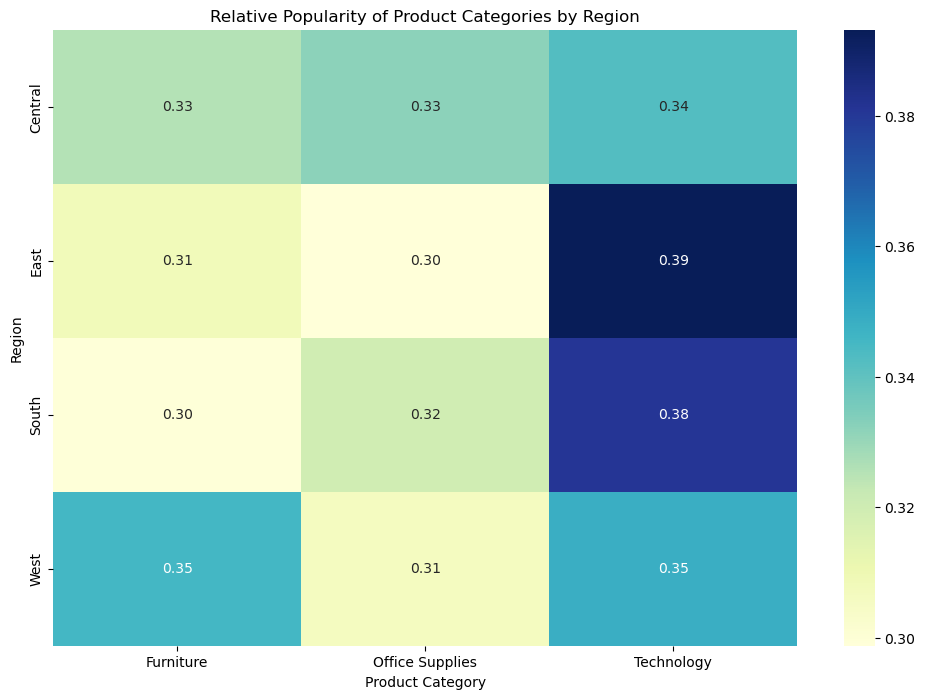

In [20]:
# Group by Region and Category, then sum Sales
category_sales_by_region = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

# Pivot the table to have Category as columns and Region as rows
category_sales_pivot = category_sales_by_region.pivot(index='Region', columns='Category', values='Sales')

# Normalize the sales data to see relative popularity within each region
category_sales_normalized = category_sales_pivot.div(category_sales_pivot.sum(axis=1), axis=0)

# Plotting heatmap to visualize category popularity by region
plt.figure(figsize=(12, 8))
sns.heatmap(category_sales_normalized, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Relative Popularity of Product Categories by Region')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.show()


Unclassified cities: ['Henderson' 'Fort Lauderdale' 'Concord' 'Seattle' 'Fort Worth' 'Madison'
 'West Jordan' 'San Francisco' 'Fremont' 'Philadelphia' 'Orem' 'Houston'
 'Richardson' 'Naperville' 'Melbourne' 'Eagan' 'Westland' 'Dover'
 'New Albany' 'New York City' 'Troy' 'Gilbert' 'Jackson' 'Memphis'
 'Decatur' 'Durham' 'Columbia' 'Rochester' 'Minneapolis' 'Portland'
 'Saint Paul' 'Aurora' 'Charlotte' 'Orland Park' 'Urbandale' 'Columbus'
 'Bristol' 'Wilmington' 'Bloomington' 'Phoenix' 'Roseville' 'Independence'
 'Pasadena' 'Newark' 'Franklin' 'Scottsdale' 'San Jose' 'Edmond'
 'Carlsbad' 'San Antonio' 'Monroe' 'Fairfield' 'Grand Prairie' 'Redlands'
 'Hamilton' 'Westfield' 'Akron' 'Denver' 'Dallas' 'Whittier' 'Saginaw'
 'Medina' 'Dublin' 'Detroit' 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego'
 'Brentwood' 'Chapel Hill' 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac'
 'Colorado Springs' 'Belleville' 'Taylor' 'Lakewood' 'Arlington' 'Arvada'
 'Hackensack' 'Saint Petersburg' 'Long Beach' 'Hes

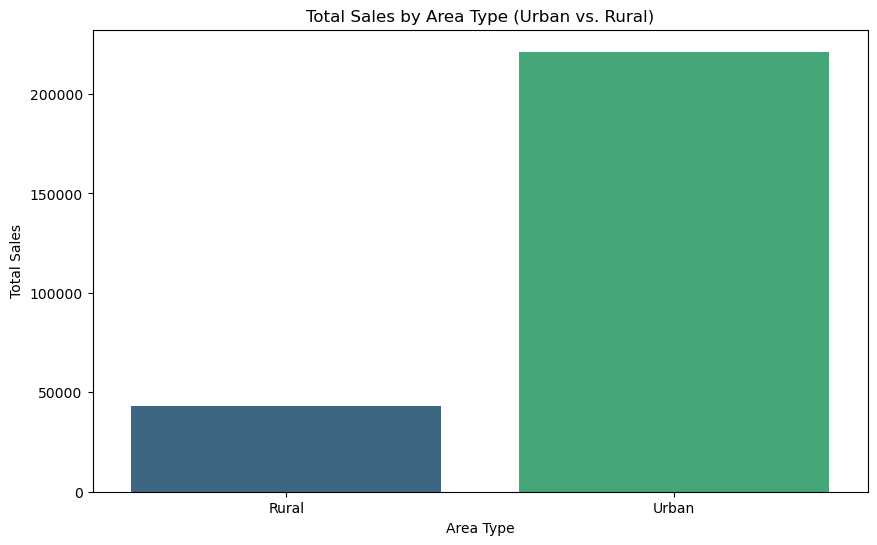

In [27]:
# Example classification of cities into Urban or Rural
city_classification = {
    'New York': 'Urban',
    'Los Angeles': 'Urban',
    'Chicago': 'Urban',
    'Springfield': 'Rural',
    'Boise': 'Rural',
    # Add all relevant cities here
}

# Create a new column 'Area Type' based on city classification
df['Area Type'] = df['City'].map(city_classification)

# Check for unclassified cities
unclassified_cities = df[df['Area Type'].isna()]['City'].unique()
if len(unclassified_cities) > 0:
    print(f"Unclassified cities: {unclassified_cities}")

# Group by Area Type and calculate total and average sales
sales_by_area_type = df.groupby('Area Type')['Sales'].agg(['sum', 'mean', 'count']).reset_index()

# Rename columns for clarity
sales_by_area_type.columns = ['Area Type', 'Total Sales', 'Average Sales per Order', 'Number of Orders']



# Plot the total sales by Urban vs. Rural
plt.figure(figsize=(10, 6))
sns.barplot(x='Area Type', y='Total Sales', data=sales_by_area_type, palette='viridis')
plt.title('Total Sales by Area Type (Urban vs. Rural)')
plt.xlabel('Area Type')
plt.ylabel('Total Sales')
plt.show()






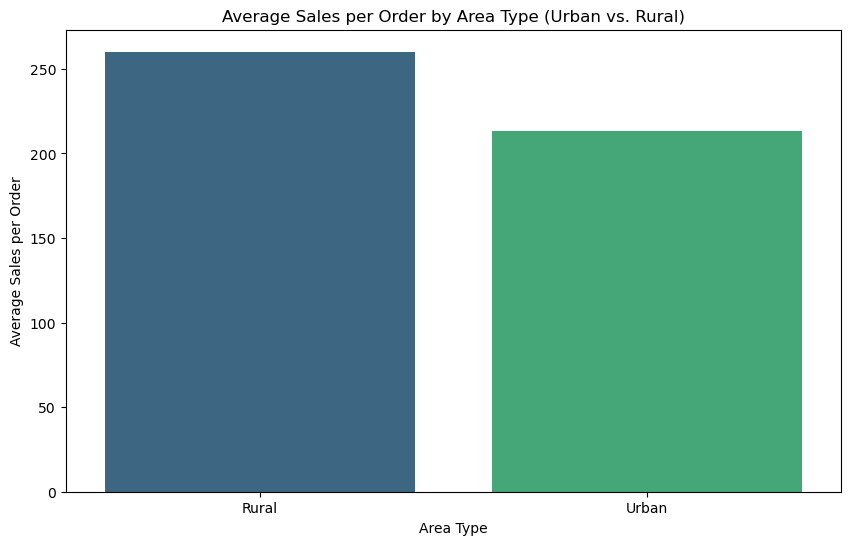

In [25]:
# Plot the average sales per order by Urban vs. Rural
plt.figure(figsize=(10, 6))
sns.barplot(x='Area Type', y='Average Sales per Order', data=sales_by_area_type, palette='viridis')
plt.title('Average Sales per Order by Area Type (Urban vs. Rural)')
plt.xlabel('Area Type')
plt.ylabel('Average Sales per Order')
plt.show()


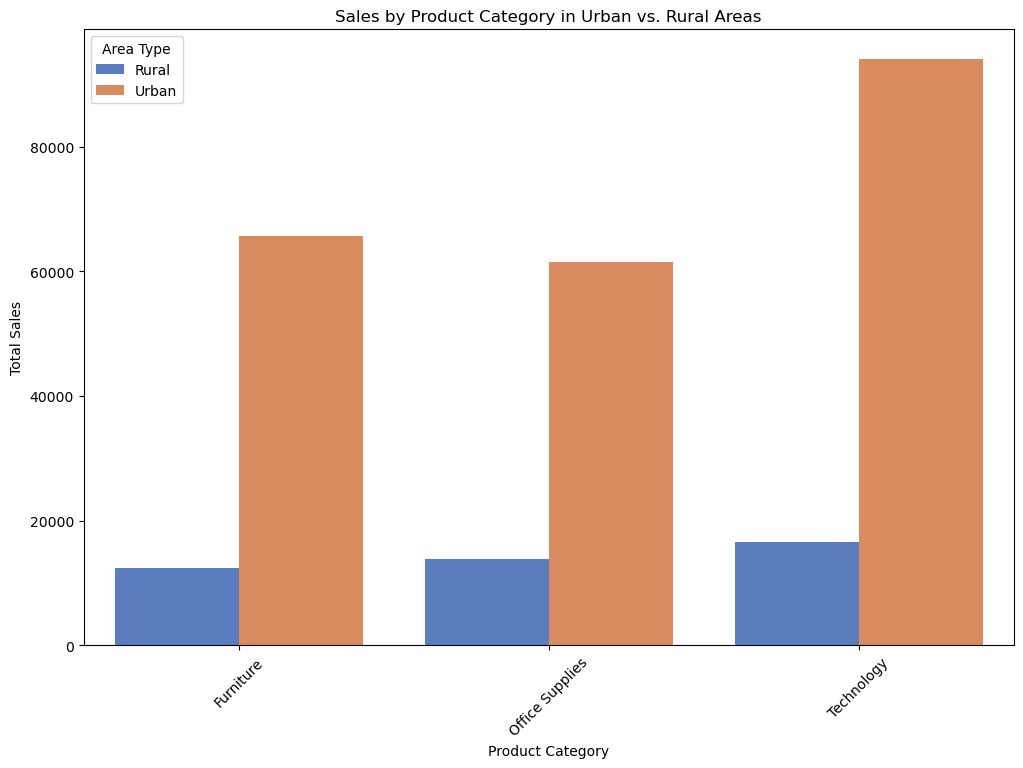

In [26]:
# Analyze sales by product category in Urban vs. Rural
category_sales_by_area = df.groupby(['Area Type', 'Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Sales', hue='Area Type', data=category_sales_by_area, palette='muted')
plt.title('Sales by Product Category in Urban vs. Rural Areas')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()